In [40]:
### Regression Dataset

import pandas as pd
import numpy as np

# From scikit library:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import data
data_f = pd.read_csv(r'Volumetric_features.csv')
#oHeaders = list(data_f.columns.values)
#npData = data_f.to_numpy()

# Split Data for set 1
X = data_f.iloc[0:1221,1:139] # All columns except the target and first column (serial numbers)
y = data_f.iloc[0:1221,139] # Target vector

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2) # Splits the data with 20% of the data set as the test set

#Scale Data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

0.023480590478711975
5.747795918367349
0.7520304439010856


C:\Users\ele26\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ele26\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


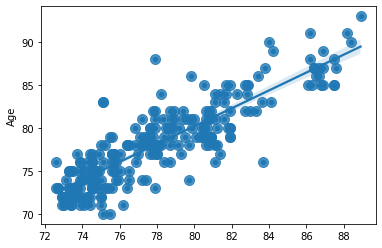

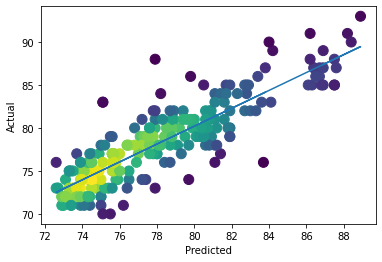

In [41]:
# Regression Model 1: kNN with 10 neighbors

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 10)
neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)

MAbsolutePerErr = mape(y_test,y_pred)
print(MAbsolutePerErr)
MSquareErr = mse(y_test,y_pred)
print(MSquareErr)
print(r2(y_test,y_pred))
sns.scatterplot(y_pred, y_test)
sns.regplot(y_pred ,y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([y_pred,y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(y_pred,y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
a, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, a*y_pred+b)
plt.show()

0.022743786743125053
6.046655102040817
0.7391371574719732


C:\Users\ele26\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ele26\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


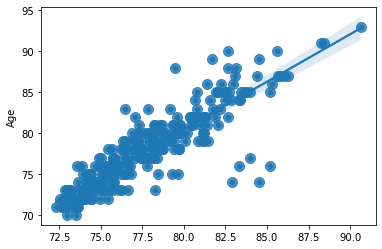

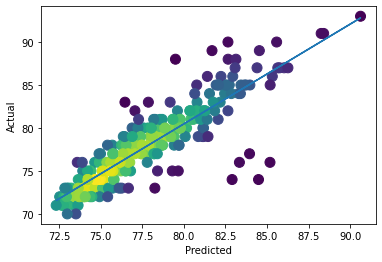

In [42]:
# Regression Model 2: Random Forest

from sklearn.ensemble import RandomForestRegressor

RandF = RandomForestRegressor(random_state = 0)
RandF.fit(X_train,y_train)

y_pred1 = RandF.predict(X_test)

MAbsolutePerErr = mape(y_test,y_pred1)
print(MAbsolutePerErr)
MSquareErr = mse(y_test,y_pred1)
print(MSquareErr)
print(r2(y_test,y_pred1))

sns.scatterplot(y_pred1, y_test)
sns.regplot(y_pred1 ,y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([y_pred1,y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
a, b = np.polyfit(y_pred1, y_test, 1)
plt.plot(y_pred1, a*y_pred1+b)
plt.show()

In [ ]:
# Regression Model 3: Multi-Layer Perceptron

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state=1, max_iter = 2000)
MLP.fit(X_train,y_train)

y_pred2 = MLP.predict(X_test)

MAbsolutePerErr = mape(y_test,y_pred2)
print(MAbsolutePerErr)
MSquareErr = mse(y_test,y_pred2)
print(MSquareErr)
print(r2(y_test,y_pred2))

sns.scatterplot(y_pred2, y_test)
sns.regplot(y_pred2 ,y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([y_pred2,y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(y_pred2,y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
a, b = np.polyfit(y_pred2, y_test, 1)
plt.plot(y_pred2, a*y_pred2+b)
plt.show()